## Forecasting Seasonal Sales - part2c

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('part2.csv')
df.shape

(60, 3)

In [4]:
df.head()

,Month,Year,sales
0,January,2012,NaN
1,February,2012,NaN
2,March,2012,NaN
3,April,2012,NaN
4,May,2012,NaN


In [6]:
df.dtypes

Month     object
Year       int64
sales    float64
dtype: object

In [7]:
start = "2012-01-01" 
end = "2016-12-01"
df.index = pd.date_range(start, end, freq='MS')
df[:5]

,Month,Year,sales
2012-01-01,January,2012,NaN
2012-02-01,February,2012,NaN
2012-03-01,March,2012,NaN
2012-04-01,April,2012,NaN
2012-05-01,May,2012,NaN


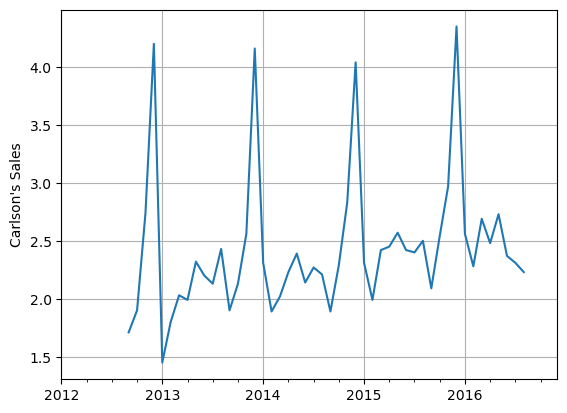

In [8]:
df['sales'].plot()
plt.xlabel("")
plt.ylabel("Carlson's Sales")
plt.grid();

## Model 1 - simple linear regression

In [9]:
# create column Period

In [10]:
list1 = list(range(1,61))
df['Period'] = list1
df[:20]

,Month,Year,sales,Period
2012-01-01,January,2012,NaN,1
2012-02-01,February,2012,NaN,2
2012-03-01,March,2012,NaN,3
2012-04-01,April,2012,NaN,4
2012-05-01,May,2012,NaN,5
2012-06-01,June,2012,NaN,6
2012-07-01,July,2012,NaN,7
2012-08-01,August,2012,NaN,8
2012-09-01,September,2012,1.71,9
2012-10-01,October,2012,1.90,10


In [11]:
model1 = smf.ols('sales~Period',data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.121
Date:                Wed, 20 Sep 2023   Prob (F-statistic):              0.152
Time:                        18:47:48   Log-Likelihood:                -42.960
No. Observations:                  48   AIC:                             89.92
Df Residuals:                      46   BIC:                             93.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1355      0.223      9.590      0.000       1.687       2.584
Period         0.0092      0.006      1.456      0.152      -0.004       0.022
==============================================================================
Omnibus:                       34.103   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.518
Skew:                           2.147   Prob(JB):                     2.95e-16
Kurtosis:                       7.161   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# not a good fit (see R-squared)

In [13]:
df['prediction'] = model1.predict(df)
df.tail()

,Month,Year,sales,Period,prediction
2016-08-01,August,2016,2.23,56,2.649439
2016-09-01,September,2016,NaN,57,2.658617
2016-10-01,October,2016,NaN,58,2.667795
2016-11-01,November,2016,NaN,59,2.676974
2016-12-01,December,2016,NaN,60,2.686152


In [14]:
df[:5]

,Month,Year,sales,Period,prediction
2012-01-01,January,2012,NaN,1,2.144635
2012-02-01,February,2012,NaN,2,2.153814
2012-03-01,March,2012,NaN,3,2.162992
2012-04-01,April,2012,NaN,4,2.172170
2012-05-01,May,2012,NaN,5,2.181348


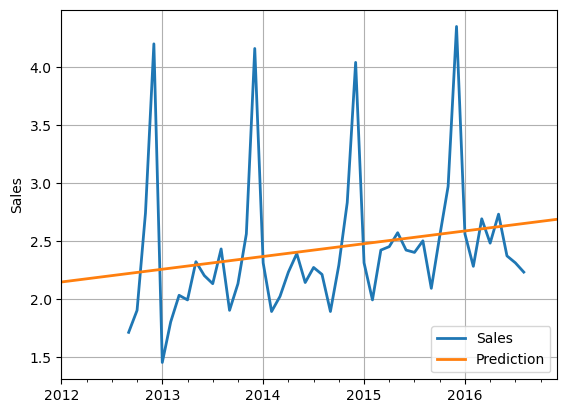

In [15]:
# plt.figure(figsize = (12,6))
df['sales'].plot(label='Sales',linewidth = 2)
df['prediction'].plot(label='Prediction',linewidth = 2)
plt.xlabel("")
plt.ylabel("Sales")
plt.legend()
plt.grid();

plot shows confidence interval for the series trend

In [16]:
# Prediction equation

In [17]:
model1.params

Intercept    2.135457
Period       0.009178
dtype: float64

In [18]:
# prediction = 2.1355 + 0.0092 Period

## Model 2 - label encoding

label encode categorical Month

In [19]:
df[:5]

,Month,Year,sales,Period,prediction
2012-01-01,January,2012,NaN,1,2.144635
2012-02-01,February,2012,NaN,2,2.153814
2012-03-01,March,2012,NaN,3,2.162992
2012-04-01,April,2012,NaN,4,2.172170
2012-05-01,May,2012,NaN,5,2.181348


In [20]:
#df3

In [21]:
# delete column prediction

In [22]:
del df['prediction']

In [23]:
#df3.drop(['prediction'],axis = 1,inplace=True)
#df3

In [24]:
# import datetime as dt

In [25]:
# use dt to extract month from column Date

In [26]:
del df['Period']

In [27]:
df[:5]

,Month,Year,sales
2012-01-01,January,2012,NaN
2012-02-01,February,2012,NaN
2012-03-01,March,2012,NaN
2012-04-01,April,2012,NaN
2012-05-01,May,2012,NaN


In [28]:
list1 = list(range(1,13))
list1 = 5*list1
df.insert(1,'Period',list1)
df[:20]

,Month,Period,Year,sales
2012-01-01,January,1,2012,NaN
2012-02-01,February,2,2012,NaN
2012-03-01,March,3,2012,NaN
2012-04-01,April,4,2012,NaN
2012-05-01,May,5,2012,NaN
2012-06-01,June,6,2012,NaN
2012-07-01,July,7,2012,NaN
2012-08-01,August,8,2012,NaN
2012-09-01,September,9,2012,1.71
2012-10-01,October,10,2012,1.90


In [29]:
# regression sales on Period, Year (both numeric)

In [30]:
model2 = smf.ols('sales ~ Period + Year',data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     11.75
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           7.86e-05
Time:                        18:47:48   Log-Likelihood:                -33.960
No. Observations:                  48   AIC:                             73.92
Df Residuals:                      45   BIC:                             79.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -269.6142    128.201     -2.103      0.041    -527.823     -11.405
Period         0.1075      0.022      4.807      0.000       0.062       0.153
Year           0.1347      0.064      2.117      0.040       0.007       0.263
==============================================================================
Omnibus:                       12.873   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.627
Skew:                           1.076   Prob(JB):                      0.00110
Kurtosis:                       4.478   Cond. No.                     3.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
df['prediction'] = model2.predict(df)

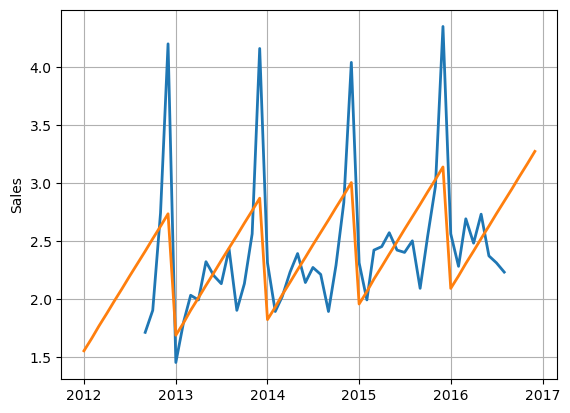

In [32]:
plt.plot(df['sales'],label='Sales',linewidth = 2)
plt.plot(df['prediction'],label='Prediction',linewidth = 2)
plt.xlabel("")
plt.ylabel("Sales")
plt.grid();

In [33]:
# prediction equation

In [34]:
model2.params

Intercept   -269.614172
Period         0.107504
Year           0.134720
dtype: float64

In [35]:
# prediction = -269.61417 + 0.1075 Period + 0.1347 Year

In [36]:
df[:5]

,Month,Period,Year,sales,prediction
2012-01-01,January,1,2012,NaN,1.550586
2012-02-01,February,2,2012,NaN,1.658089
2012-03-01,March,3,2012,NaN,1.765593
2012-04-01,April,4,2012,NaN,1.873097
2012-05-01,May,5,2012,NaN,1.980600


# Model 3 - One-hot encoding

In [37]:
# remove columns

In [38]:
df.drop(['prediction','Period'],axis = 1,inplace=True)
df[:5]

,Month,Year,sales
2012-01-01,January,2012,NaN
2012-02-01,February,2012,NaN
2012-03-01,March,2012,NaN
2012-04-01,April,2012,NaN
2012-05-01,May,2012,NaN


In [39]:
df.dtypes 

Month     object
Year       int64
sales    float64
dtype: object

In [40]:
# regression sales on Year (numeric) and Month (categorical)

In [41]:
model3 = smf.ols('sales~Year+Month',data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     52.35
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           1.01e-18
Time:                        18:47:48   Log-Likelihood:                 26.559
No. Observations:                  48   AIC:                            -27.12
Df Residuals:                      35   BIC:                            -2.792
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -266.3125     42.378     -6.284      0.000    -352.345    -180.280
Month[T.August]        0.0550      0.115      0.477      0.636      -0.179       0.289
Month[T.December]      2.0333      0.117     17.360      0.000       1.796       2.271
Month[T.February]     -0.2975      0.115     -2.582      0.014      -0.531      -0.064
Month[T.January]      -0.1300      0.115     -1.128      0.267      -0.364       0.104
Month[T.July]         -0.0100      0.115     -0.087      0.931      -0.244       0.224
Month[T.June]         -0.0050      0.115     -0.043      0.966      -0.239       0.229
Month[T.March]         0.0025      0.115      0.022      0.983      -0.231       0.236
Month[T.May]           0.2150      0.115      1.866      0.070      -0.019       0.449
Month[T.November]      0.6208      0.117      5.301      0.000       0.383       0.859
Month[T.October]       0.0608      0.117      0.519      0.607      -0.177       0.299
Month[T.September]    -0.2567      0.117     -2.191      0.035      -0.494      -0.019
Year                   0.1333      0.021      6.338      0.000       0.091       0.176
==============================================================================
Omnibus:                       13.803   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.633
Skew:                          -0.930   Prob(JB):                     8.99e-05
Kurtosis:                       5.419   Cond. No.                     3.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# best model (see R-squared)

In [43]:
df['prediction'] = model3.predict(df)
df.tail()

,Month,Year,sales,prediction
2016-08-01,August,2016,2.23,2.542500
2016-09-01,September,2016,NaN,2.230833
2016-10-01,October,2016,NaN,2.548333
2016-11-01,November,2016,NaN,3.108333
2016-12-01,December,2016,NaN,4.520833


In [44]:
# plot predictions only

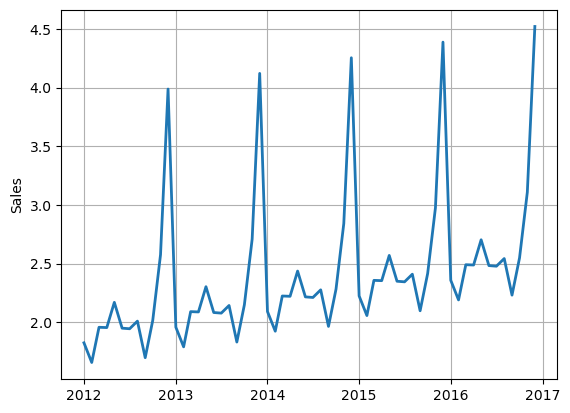

In [45]:
#plt.figure(figsize = (12,6))
plt.plot(df['prediction'],label='Prediction',linewidth = 2)
plt.xlabel("")
plt.ylabel("Sales")
plt.grid();

Notice that the shape of each cycle looks the same, but with increasing values

In [46]:
# plot prediction and data

In [47]:
list3 = ['sales','prediction']
df3 = df[list3]
df3[:9]

,sales,prediction
2012-01-01,NaN,1.824167
2012-02-01,NaN,1.656667
2012-03-01,NaN,1.956667
2012-04-01,NaN,1.954167
2012-05-01,NaN,2.169167
2012-06-01,NaN,1.949167
2012-07-01,NaN,1.944167
2012-08-01,NaN,2.009167
2012-09-01,1.71,1.697500


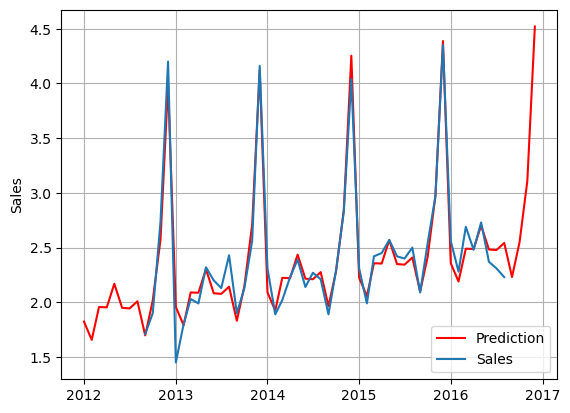

In [48]:
# plt.figure(figsize = (14,6))
# plot prediction
plt.plot(df3['prediction'],'r',label='Prediction')
# plot data
plt.plot(df3['sales'],label='Sales',markersize = 4)
plt.xlabel("")
plt.ylabel("Sales")
plt.legend()
plt.grid();

In [49]:
# 12 prediction equations

In [50]:
model3.params

Intercept            -266.312500
Month[T.August]         0.055000
Month[T.December]       2.033333
Month[T.February]      -0.297500
Month[T.January]       -0.130000
Month[T.July]          -0.010000
Month[T.June]          -0.005000
Month[T.March]          0.002500
Month[T.May]            0.215000
Month[T.November]       0.620833
Month[T.October]        0.060833
Month[T.September]     -0.256667
Year                    0.133333
dtype: float64

In [51]:
# April prediction  = -266.3125 + 0.1333 Year

In [52]:
# March prediction  = (-266.3125 + 0.0025) + 0.1333 Year